In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['legend.fontsize'] = 'x-large'
matplotlib.rcParams['axes.titlesize'] = 'xx-large'
matplotlib.rcParams['axes.labelsize'] = 'xx-large' # For an axes xlabel and ylabel
matplotlib.rcParams['xtick.labelsize'] = 'xx-large'
matplotlib.rcParams['ytick.labelsize'] = 'xx-large'

In [3]:
models = ['wang', 'pysr_eq4', 'sfs6_nn', '24_feat_nn']
resolutions = ['r2b5', 'r2b6', 'r2b7']

results_dict = {}
for model in models:
    for res in resolutions:
        try:
            with open('results/%s_%s.json'%(model, res), 'r') as file:
                results_dict['%s_%s'%(model, res)] = list(json.load(file).values())[0]
        except:
            print('%s_%s is still missing.'%(model, res))

Text(0, 0.5, 'MSE')

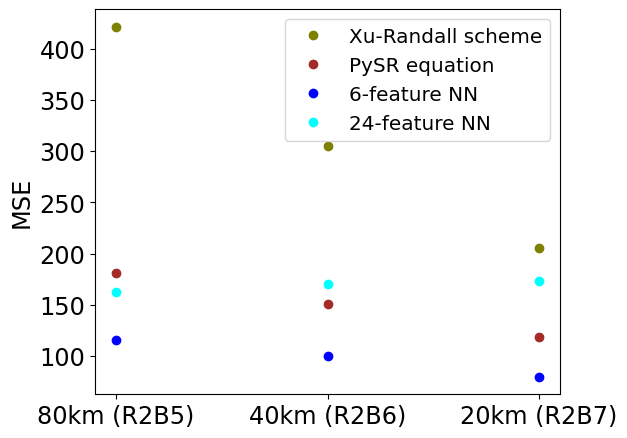

In [4]:
# MSE
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1)

x_values = ['80km (R2B5)', '40km (R2B6)', '20km (R2B7)']
colors = {'wang': 'olive', 'pysr_eq4': 'brown', 'sfs6_nn': 'blue', '24_feat_nn': 'cyan'}

for model in models:
    Y = [results_dict['%s_%s'%(model, res)]['MSE'] for res in resolutions if '%s_%s'%(model, res) in results_dict.keys()]
    ax.plot(x_values[:(len(Y))], Y, 'o', color=colors[model])
    
ax.legend(['Xu-Randall scheme', 'PySR equation', '6-feature NN', '24-feature NN'])
plt.ylabel('MSE')

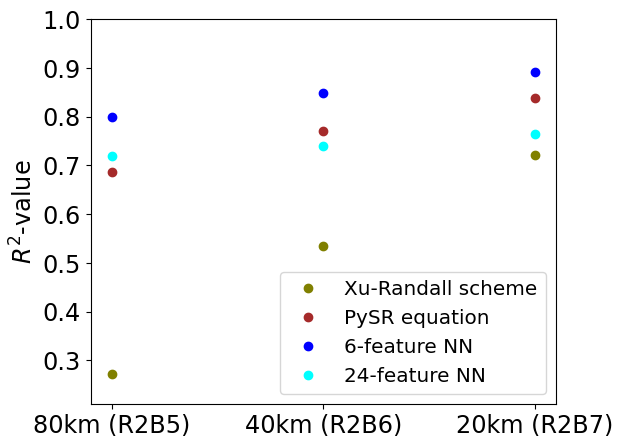

In [5]:
# R2
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1)

x_values = ['80km (R2B5)', '40km (R2B6)', '20km (R2B7)']
colors = {'wang': 'olive', 'pysr_eq4': 'brown', 'sfs6_nn': 'blue', '24_feat_nn': 'cyan'}

for model in models:
    Y = [results_dict['%s_%s'%(model, res)]['R2'] for res in resolutions if '%s_%s'%(model, res) in results_dict.keys()]
    ax.plot(x_values[:(len(Y))], Y, 'o', color=colors[model], linewidth=1)
    
ax.legend(['Xu-Randall scheme', 'PySR equation', '6-feature NN', '24-feature NN'])
plt.ylim([0.21, 1])
plt.ylabel('$R^2$-value')

plt.savefig('results/fig_res_transfer.pdf', bbox_inches='tight')